# Logistic Regression

## The data

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个人，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

In [17]:
#三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [19]:
pdData.shape

(100, 3)

      Exam 1     Exam 2  Admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1


Text(0,0.5,'Exam 2 Score')

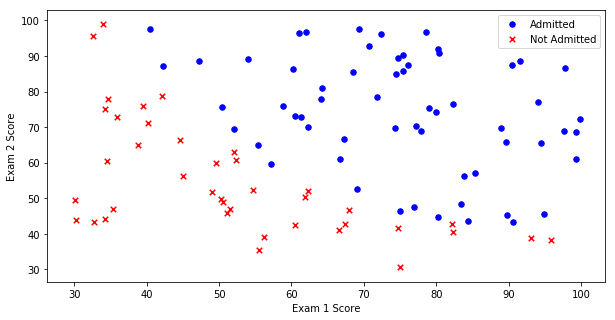

In [20]:
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples
print(positive.head())
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## The logistic regression

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

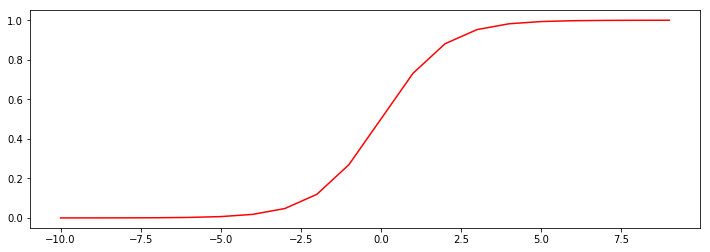

In [22]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$

In [23]:
def model(X, theta):
    """ Returns our model result
    :param X: examples to classify, n x p
    :param theta: parameters, 1 x p
    :return: the sigmoid evaluated for each examples in X given parameters theta as a n x 1 vector
    """
    return sigmoid(np.dot(X, theta.T))

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [24]:
#del pdData['Ones']
pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times


# set X (training data) and y (target variable)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
print(cols)
X = orig_data[:,0:cols-1]  # 前三列为特征值
y = orig_data[:,cols-1:cols] # 最后一列为标签

# convert to numpy arrays and initalize the parameter array theta
#X = np.matrix(X.values)
#y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
theta = np.zeros([1, 3])

4


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [25]:
#orig_data
theta = np.zeros((1,3))
theta

array([[0., 0., 0.]])

In [26]:
X[:5,:]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [27]:
y[:5,:]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [28]:
theta

array([[0., 0., 0.]])

In [29]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [30]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta))) # 元素级的计算用multiply
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [31]:
cost(X, y, theta) #先瞅一眼公式编写的正确与否

0.6931471805599453

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [32]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)  #初始化梯度向量
    error = (model(X, theta)- y).ravel()  # reval将多维数组降为一维
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j]) # 取所有样本第j列进行一轮更新
        grad[0, j] = np.sum(term) / len(X) #求和并平均
    return grad

### Gradient descent

In [34]:
len(theta)
len(theta.ravel())

3

In [35]:
grad = gradient(X, y, theta)  # 看看梯度下降函数编写是否正确
print(grad)

[[ -0.1        -12.00921659 -11.26284221]]


比较3中不同梯度下降方法


In [41]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    # value:根据不同的停止类型，所得出的类型的值，如迭代的次数
    # threshold:阈值，达到阈值即停止
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [23]:
np.linalg.norm([[1],[2]])  #linalg.norm:线性代数中求解2范数，即求解向量的模

2.23606797749979

In [42]:
import numpy.random
#洗牌，打乱样本的顺序，使其泛化能力更强
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [43]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch：批
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值

    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据，每次取一小批量数据
        if k >= n: 
            k = 0 
            X, y = shuffleData(data) # 重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i #累计迭代次数
        elif stopType == STOP_COST:     value = costs # 最终的损失值
        elif stopType == STOP_GRAD:     value = grad # 最终的梯度向量
        if stopCriterion(stopType, value, thresh): break # 达到了停止条件就退出
    
    return theta, i-1, costs, grad, time.time() - init_time # 返回theta值，迭代次数，最终的损失值，最终的梯度向量，所消耗的时间

In [44]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    # 展示求解过程及结果的一个函数
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

#### 设定迭代次数

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.08s


array([[-0.00027127,  0.00705232,  0.00376711]])

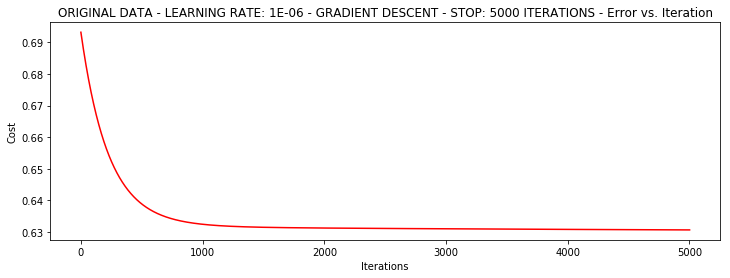

In [45]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

#### 根据损失值停止

设定阈值 1E-6, 差不多需要110 000次迭代 

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 23.08s


array([[-5.13364014,  0.04771429,  0.04072397]])

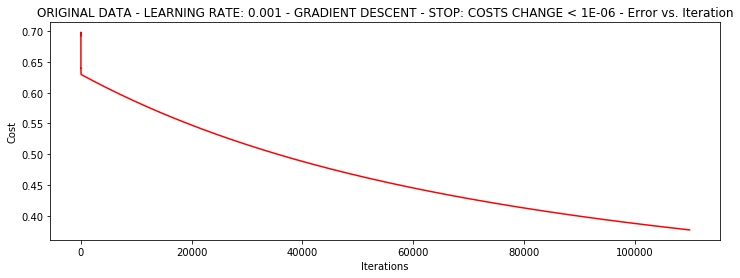

In [46]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

#### 根据梯度变化停止

设定阈值 0.05,差不多需要40 000次迭代

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 8.96s


array([[-2.37033409,  0.02721692,  0.01899456]])

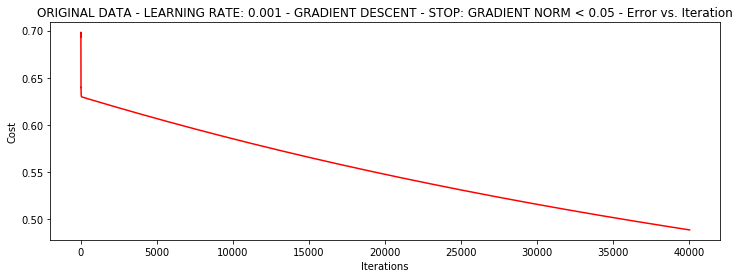

In [47]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

### 对比不同的梯度下降方法

#### Stochastic descent 随机梯度下降

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38854878  0.02892549  0.04818406]] - Iter: 5000 - Last cost: 1.51 - Duration: 0.33s


array([[-0.38854878,  0.02892549,  0.04818406]])

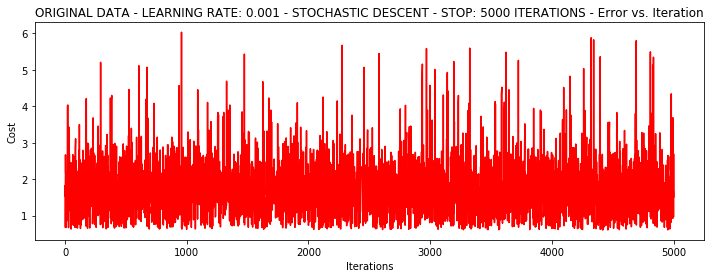

In [48]:
# 每次只用一个样本
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

有点爆炸。。。很不稳定,再来试试把学习率调小一些

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202133  0.01000404  0.00093025]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.03s


array([[-0.00202133,  0.01000404,  0.00093025]])

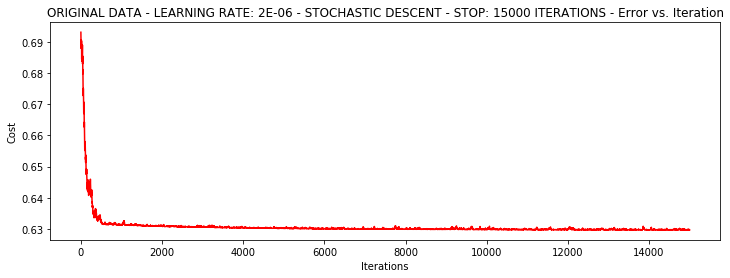

In [49]:
# 每次还是只用一个样本，但是把学习率调小
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

速度快，但稳定性差，需要很小的学习率

#### Mini-batch descent 小批量的梯度下降

***Original data - learning rate: 1e-05 - Mini-batch (15) descent - Stop: 15000 iterations
Theta: [[-0.01040212  0.01030984  0.00050883]] - Iter: 15000 - Last cost: 0.63 - Duration: 1.39s


array([[-0.01040212,  0.01030984,  0.00050883]])

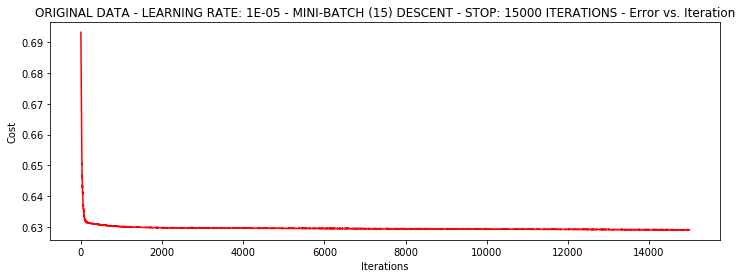

In [52]:
# 每次用15个样本
runExpe(orig_data, theta, 15, STOP_ITER, thresh=15000, alpha=0.00001)

浮动仍然比较大，我们来尝试下对数据进行标准化
将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 1.18s


array([[0.3080807 , 0.86494967, 0.77367651]])

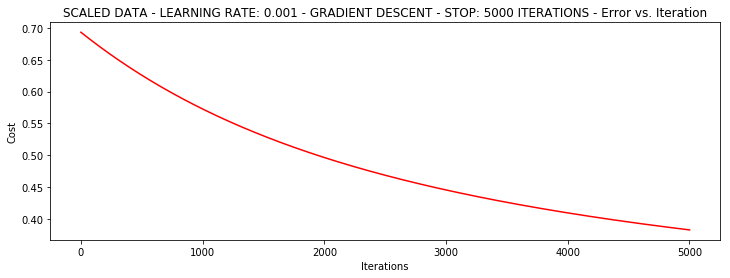

In [53]:
# 对原始数据进行标准化
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)

它好多了！原始数据，只能达到0.61，而我们得到了0.38！
所以对数据做预处理是非常重要的

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.02
Theta: [[1.0707921  2.63030842 2.41079787]] - Iter: 59422 - Last cost: 0.22 - Duration: 13.61s


array([[1.0707921 , 2.63030842, 2.41079787]])

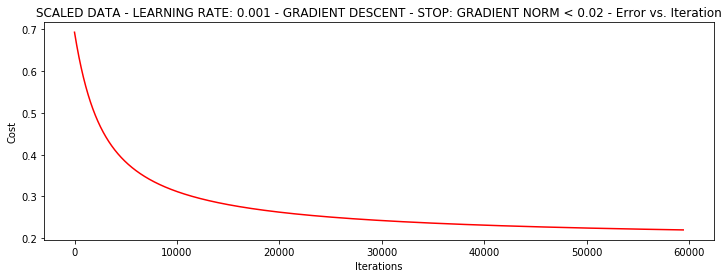

In [54]:
# 根据梯度大小来停止
runExpe(scaled_data, theta, n, STOP_GRAD, thresh=0.02, alpha=0.001)

更多的迭代次数会使得损失下降的更多！

***Scaled data - learning rate: 0.001 - Stochastic descent - Stop: gradient norm < 0.0004
Theta: [[1.1478527  2.79349962 2.56521029]] - Iter: 72571 - Last cost: 0.22 - Duration: 6.23s


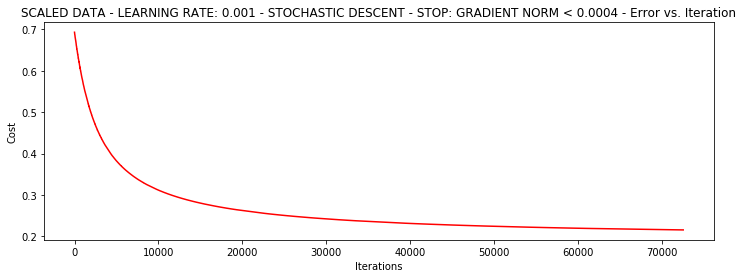

In [55]:
# 调小梯度停止的阈值，并使用随机梯度下降
theta = runExpe(scaled_data, theta, 1, STOP_GRAD, thresh=0.002/5, alpha=0.001)

随机梯度下降更快，但是我们需要迭代的次数也需要更多，所以还是用batch的比较合适！！！

***Scaled data - learning rate: 0.0001 - Mini-batch (16) descent - Stop: gradient norm < 0.001
Theta: [[1.20296783 2.90634214 2.67593002]] - Iter: 110991 - Last cost: 0.21 - Duration: 11.68s


array([[1.20296783, 2.90634214, 2.67593002]])

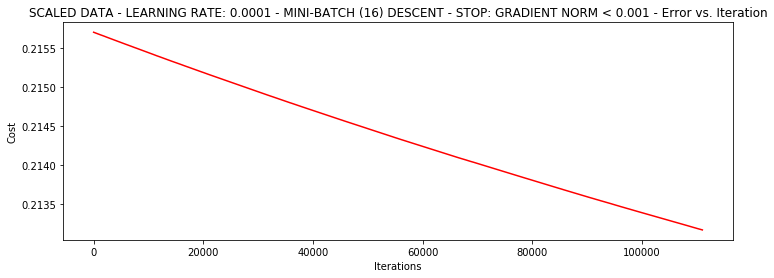

In [56]:
# 使用小批量梯度下降
runExpe(scaled_data, theta, 16, STOP_GRAD, thresh=0.001, alpha=0.0001)

## 准确率

In [57]:
#设定阈值，把概率转为类别
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [58]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
print(theta)
print(predictions)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))*100
print ('accuracy = {0}%'.format(accuracy))

[[1.1478527  2.79349962 2.56521029]]
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
accuracy = 89.0%
